In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import multivariate_normal
from scipy.optimize import minimize
import math

In [2]:
#DONE
def sigmoid_squashing(x):
    return 1./(1+np.exp(-x))

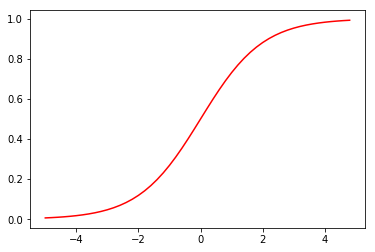

In [3]:
#DONE
def draw_sigmoid():    
    x = np.arange(-5., 5., 0.2)
    n = len(x)
    y = np.ones(n)

    for i in range(n):
        y[i] = sigmoid_squashing(x[i])

    plt.plot(x, y, 'r')
    plt.show()
draw_sigmoid()

In [247]:
def sigmoid(x):
    return 1./(1+np.exp(-x))

In [5]:
#DONE
def sigmoid_1(x):
    return math.erf(math.sqrt(math.pi)*x/2)

In [6]:
#DONE
def sigmoid_2(x):
    return np.tanh(x)

In [7]:
#DONE
def sigmoid_3(x):
    return (2./math.pi)*np.arcsin(np.tanh((math.pi/2.)*x))

In [8]:
#DONE
def sigmoid_4(x):
    return x/np.sqrt(1+x**2)

In [9]:
#DONE
def sigmoid_5(x):
    return (2./math.pi)*np.arctan((math.pi*x/2.))

In [10]:
#DONE
def sigmoid_6(x):
    return x/(1 + np.absolute(x))

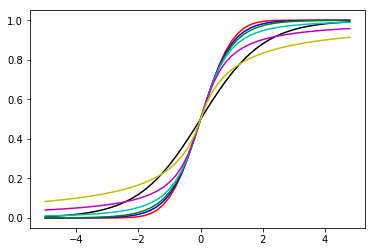

In [11]:
#DONE
def draw_sigmoid_examples():
    x = np.arange(-5., 5., 0.2)
    n = len(x)
    y = np.ones(n)
    y_1 = np.ones(n)
    y_2 = np.ones(n)
    y_3 = np.ones(n)
    y_4 = np.ones(n)
    y_5 = np.ones(n)
    y_6 = np.ones(n)

    for i in range(n):
        y = sigmoid(x)
        y_1[i] = (sigmoid_1(x[i]) + 1) / 2
        y_2[i] = (sigmoid_2(x[i]) + 1) / 2
        y_3[i] = (sigmoid_3(x[i]) + 1) / 2
        y_4[i] = (sigmoid_4(x[i]) + 1) / 2
        y_5[i] = (sigmoid_5(x[i]) + 1) / 2
        y_6[i] = (sigmoid_6(x[i]) + 1) / 2

    plt.plot(x, y, 'k', x, y_1, 'r', x, y_2, 'b', x, y_3, 'g', x, y_4, 'c', x, y_5, 'm', x, y_6, 'y')
    plt.show()
    
draw_sigmoid_examples()

In [12]:
#DONE
def kernal(x, y, params, sigma_n):
    diff = np.subtract.outer(x, y)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) *diff**2)
    value[np.where(diff == 0.0)] += sigma_n
    return value

In [270]:
def find_f(K, y, iterations=100):
    n = len(y)
    f = np.zeros(n)
    
    y_giv_f = np.zeros(n)
    grad = np.ones(n)
    for i in range(0, iterations):
        for j in range(n):
            y_giv_f[j] = sigmoid(f[j]*y[j])
            grad[j] = (1-y_giv_f[j])*y[j]
        f = np.array(np.matmul(K, grad)).flatten()
    for j in range(n):
        y_giv_f[j] = sigmoid(f[j]*y[j])
    print("FY", f[j]*y[j])
    print("aa", y_giv_f[j])
    return f, y_giv_f

In [271]:
#DONE
def calculate_W(f, y):
    n = len(y)
    W = np.zeros(n)
    for j in range(n):
        sigmoid_v = sigmoid(f[j]*y[j])
        W[j] = y[j]**2 * (1-sigmoid_v)*sigmoid_v
    return W
        

# #DONE
# def calculate_W(y_giv_f):
#     return np.diag(-np.gradient(np.gradient(np.log(y_giv_f))))

In [262]:
#DONE
def calculate_KP(K, W):
    return K + (1.0/W)

In [263]:
#DONE
def GP(x_new, x, y, kernal, theta):
    K = kernal(x, x, theta[:-1], theta[-1]) # K
    KS = kernal(x_new, x, theta[:-1], theta[-1]) # K*
    KSS = kernal(x_new, x_new, theta[:-1], theta[-1]) # K**
    
    f, y_giv_f = find_f(K, y)
    W = calculate_W(f, y)
    
    KP = calculate_KP(K, W)

    f_bar = np.matmul(np.matmul(KS, np.linalg.inv(K)), f)    
    var = KSS - KS.dot(np.linalg.inv(KP).dot(KS.T))
    var = np.diagonal(var)
    return(f_bar.squeeze(), var.squeeze())

In [264]:
#DONE
def pretty_plot(fig, axs, xlim=(-20,20), ylim=(-1.5,1.5), size=(10,10)):
    plt.ylim(ylim)
    plt.xlim(xlim)
    fig.set_size_inches(size)
    plt.show()

In [265]:
#DONE
def get_low_and_high(y_bar, var):
    sigma = np.sqrt(var)
    y_low = y_bar - 1.96 * sigma
    y_high = y_bar + 1.96 * sigma
    return y_low, y_high

In [266]:
#DONE
def optimize_theta(x, y, kernal, params_0=[0.1, 0.1], sigma_n=0.1):
    def log_pY(theta):
        K = np.matrix(kernal(x, x, theta, sigma_n))
        f, y_giv_f = find_f(K, y, 100)
        W = calculate_W(f, y)
        inv_k = np.linalg.inv(K)
        log_k = np.log(np.linalg.det(K) * np.linalg.det(inv_k+W))
        Y_giv_f = np.prod(y_giv_f)
        print("y_giv_f", Y_giv_f)
        output = 0.5 * np.matmul(np.matmul(f.T, inv_k),f)
        output += 0.5 * log_k
        output -= np.log(Y_giv_f)
        return output

    res = minimize(log_pY, params_0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    return list(res.x) + [sigma_n]

In [267]:
#DONE
x_1 = np.random.choice(np.linspace(-11, -9, 100), 10, replace=False)
x_2 = np.random.choice(np.linspace(-1, 1, 100), 10, replace=False)
x_3 = np.random.choice(np.linspace(9, 11, 100), 10, replace=False)
x = np.concatenate((x_1, x_2, x_3), axis=0)
y = -1 * np.ones(len(x))
y[np.where(abs(x)<2)] = 1

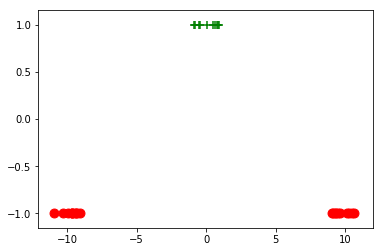

In [268]:
#DONE
def show_plot():
    for i in range(len(x)):
        if y[i] > 0:
            plt.scatter(x[i], y[i], 80, marker='+', color='g')
        else:
            plt.scatter(x[i], y[i], 80, marker='o', color='r')
    plt.show()
show_plot()

FY 0.510070705471
aa 0.624823049335
y_giv_f 7.03423810723e-07
FY 0.545464692593
aa 0.633082726327
y_giv_f 1.04659328064e-06
FY 0.495057827658
aa 0.621297201382
y_giv_f 5.77842755037e-07
FY 0.560814142144
aa 0.636640896129
y_giv_f 1.26456349698e-06
FY 0.59383068831
aa 0.644243599961
y_giv_f 1.83578679014e-06
FY 0.631013599315
aa 0.652719257222
y_giv_f 2.72593251112e-06
FY 0.692501075505
aa 0.666523072308
y_giv_f 5.16684519897e-06
FY 0.73642440602
aa 0.676213477976
y_giv_f 7.94949554594e-06
FY 0.817721688957
aa 0.693752504007
y_giv_f 1.66414976496e-05
FY 0.906990469198
aa 0.712383925101
y_giv_f 3.62172078552e-05
FY 1.02187235366
aa 0.73533715077
y_giv_f 8.75758142033e-05
FY 1.00318780127
aa 0.731684876559
y_giv_f 5.51181419756e-05
FY 0.653384324371
aa 0.657772706672
y_giv_f 7.93508226587e-07
FY 0.944038147213
aa 0.719914622183
y_giv_f 4.75760467625e-05
FY 1.00536249025
aa 0.732111600936
y_giv_f 4.67292981319e-05
FY 1.05191094766
aa 0.741141684713
y_giv_f 8.76996304115e-05
FY 1.0469859912

FY 1.18583846506
aa 0.765995950975
y_giv_f 0.000341766389124
FY 1.18583846773
aa 0.765995951454
y_giv_f 0.000341766396904
FY 1.18583846538
aa 0.765995951032
y_giv_f 0.000341766384544
FY 1.18583846596
aa 0.765995951137
y_giv_f 0.000341766387634
FY 1.18583846655
aa 0.765995951243
y_giv_f 0.000341766390724
FY 1.18583846789
aa 0.765995951482
y_giv_f 0.000341766394614
FY 1.18583846938
aa 0.76599595175
y_giv_f 0.000341766396214
FY 1.18583846726
aa 0.76599595137
y_giv_f 0.000341766392096
FY 1.18583846797
aa 0.765995951496
y_giv_f 0.000341766393469
FY 1.1858384673
aa 0.765995951377
y_giv_f 0.000341766391524
FY 1.18583846872
aa 0.76599595163
y_giv_f 0.000341766394269
FY 1.18583846836
aa 0.765995951567
y_giv_f 0.000341766393583
FY 1.18583846801
aa 0.765995951503
y_giv_f 0.000341766392897
FY 1.18583846767
aa 0.765995951444
y_giv_f 0.000341766391924
FY 1.18583846838
aa 0.76599595157
y_giv_f 0.000341766393297
FY 1.18583846785
aa 0.765995951475
y_giv_f 0.000341766392267
FY 1.1858384682
aa 0.76599595

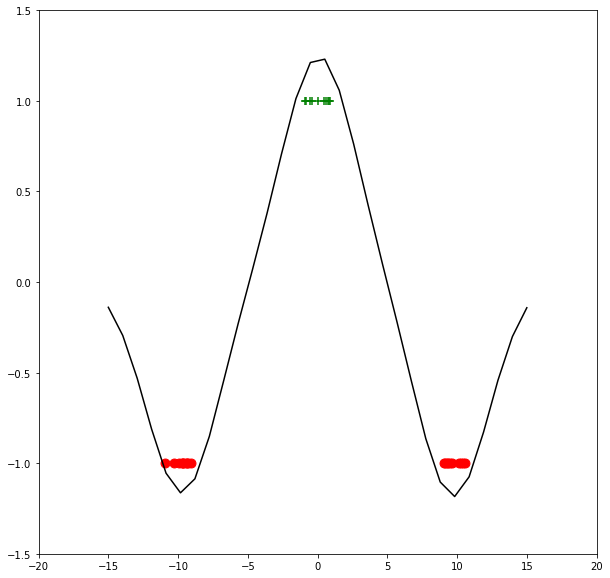

In [272]:
x_new = np.linspace(-15, 15, 30)
params_0 = [.4, 5]
sigma_n = 0.1
theta = optimize_theta(x, y, kernal, params_0=params_0, sigma_n=sigma_n)
#theta = [0.65, 4, sigma_n]
y_bar, var = GP(x_new, x, y, kernal, theta)

fig, axs = plt.subplots(1, 1)
for i in range(len(x)):
    if y[i] > 0:
        axs.scatter(x[i], y[i], 80, marker='+', color='g')
    else:
        axs.scatter(x[i], y[i], 80, marker='o', color='r')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)

In [ ]:
x_new = np.linspace(-15, 15, 30)
theta = [1, 0.5]
y_bar, var = GP(x_new, x, y, kernal, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
for i in range(len(x)):
    if y[i] > 0:
        axs.scatter(x[i], y[i], 100, marker='+', color='g')
    else:
        axs.scatter(x[i], y[i], 100, marker='o', color='r')
prob = np.zeros(len(y_bar))
for i in range(len(y_bar)):
    prob[i] = sigmoid(y_bar[i])
axs.plot(x_new, prob,  color='k')
pretty_plot(fig, axs)